In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# 4-Deployment

## 4.1-Three ways of deploying a model

Multiple options for deploy our model:
1. **Batch - Offline**: The model is not up and running all the time, we just train our model in a regular basis if needed;
2. **Online**: The model is up and running all the time
    - **Web service**: When we use a http request to get predictions
    - **Streaming**: when there is a certain event and the model reacts to it

### 1 - Batch Mode

Run the model regularly - hourly, daily, or monthly.

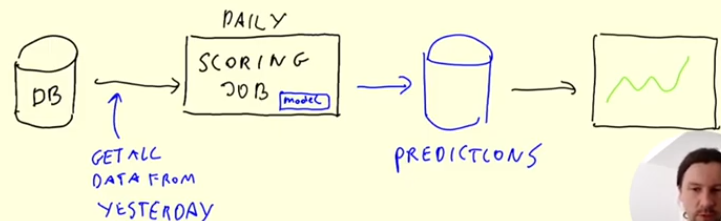

We can use this type of models in Marketing related tasks, like a **customer churn** to the competitor.

### 2.1 - Online : WebService

For example a **Ride Duration Service:**

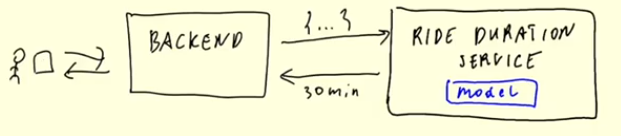

This model needs to be running all the time, because the user needs to know the duration of the ride immediately when they are using the app.

`This is different than Streaming because we have a 1 to 1 relationship: cliente <> server`

### 2.2 - Online : Streaming

Streaming is a 1 to many relationship. Meaning that there are multiple services that are consumed by the user without a request. For example when a taxi ride start, we has consumers have access to an duration prediction that is always updating that is a service using a streaming deployment type.

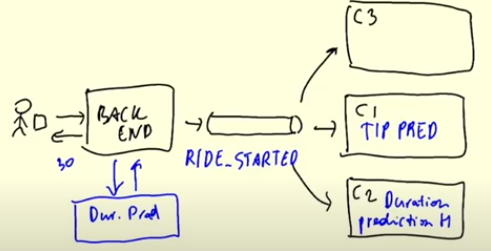

The streaming services are noted as C1, C2, and C3.

Other case that uses streaming is youtube:

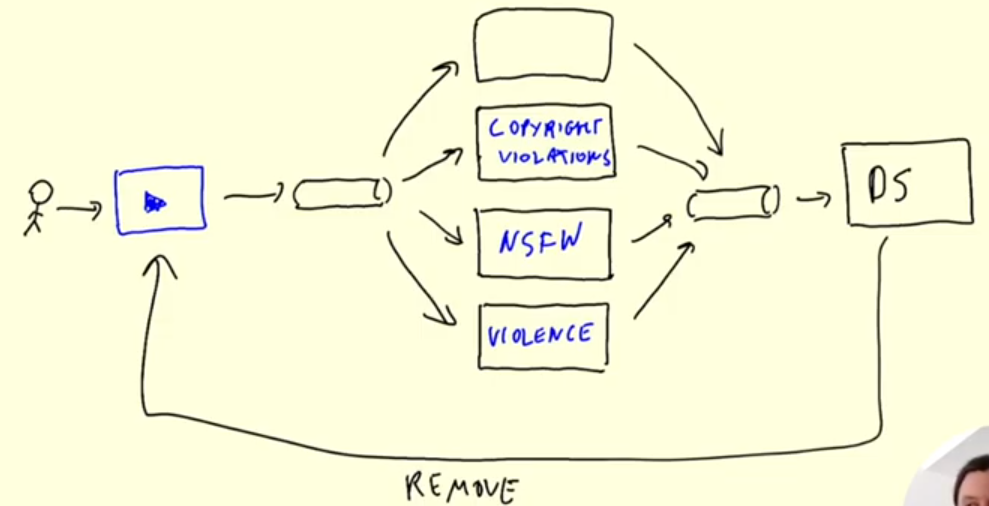

### Additional Links:

- Difference between Web Service and Streaming - [link](https://nordicapis.com/rest-vs-streaming-apis-how-they-differ/)

## 4.2-Web services: Deploying models with Flask and Docker

1. Creating a virtual environment with Pipenv;
2. Creating a script for predicting;
3. Putting the script into a Flask app;
4. Packaging the app to Docker

## 4.3-Web services: Getting the models from the model registry mlflow

* Take the code from the previous video
* Train another model, register with MLflow
* Put the model into a scikit-learn pipeline
* Model deployment with tracking server
* Model deployment without the tracking server

Starting the MLflow server with S3:

```bash
mlflow server \
    --backend-store-uri=sqlite:///mlflow.db \
    --default-artifact-root=s3://mlflow-models-alexey/
```

Downloading the artifact

```bash
export MLFLOW_TRACKING_URI="http://127.0.0.1:5000"
export MODEL_RUN_ID="6dd459b11b4e48dc862f4e1019d166f6"

mlflow artifacts download \
    --run-id ${MODEL_RUN_ID} \
    --artifact-path model \
    --dst-path .
```

## 4.5-Batch: Preparing a scoring script

## 4.6-Batch: Scheduling batch scoring jobs with Prefect

1. Configure storage:
    - Do `prefect --help` to check how it is done;
    - `prefect storage --help`
    - `prefect storage create` - go with local storage, choose a path inside the working directory and do not make it default

2. Do `prefect deployment create score_deploy.py` in order to deploy it